# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

## Libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt, colors as mcolors

In [3]:
%matplotlib notebook

## Get dataframe from dataset

In [4]:
# Read dataset
#df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df = pd.read_csv('dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Dataset of the minimum and maximum temperature for each day
df = pd.pivot_table(
    df, 
    values = 'Data_Value',
    index = ['Date'],
    aggfunc = [min, max]
).rename(
    columns = {
        'min': 'T_min',
        'max': 'T_max'
    }
).droplevel(1, axis = 1)
df.index.name = None
df[['T_min', 'T_max']] /= 10

display(df)

# Removing the days 29th February
df = df.loc[~((df.index.month == 2) & (df.index.day == 29))]

# Group by 2005-2014
df_groups = df.loc['2005':'2014'].groupby(lambda x: '2015-' + str(x.month) + '-' + str(x.day))
df_all_years = pd.merge(
    df_groups.min()['T_min'],
    df_groups.max()['T_max'],
    how = 'inner',
    left_index = True,
    right_index = True
)

df_all_years.index = pd.to_datetime(df_all_years.index)
df_all_years.sort_index(inplace = True)

# Group by 2015
df_2015 = df.loc['2015']
df_2015.index  = pd.to_datetime(df_2015.index)
df_2015_records_high = df_2015.where(df_2015['T_max'] > df_all_years['T_max']).dropna()['T_max']
df_2015_records_low = df_2015.where(df_2015['T_min'] < df_all_years['T_min']).dropna()['T_min']

,T_min,T_max
2005-01-01,-5.6,15.6
2005-01-02,-5.6,13.9
2005-01-03,0.0,13.3
2005-01-04,-3.9,3.9
2005-01-05,-9.4,3.3
...,...,...
2015-12-27,-0.6,8.3
2015-12-28,-3.9,6.1
2015-12-29,-3.9,10.0
2015-12-30,-2.2,6.7


## Chart

<IPython.core.display.Javascript object>


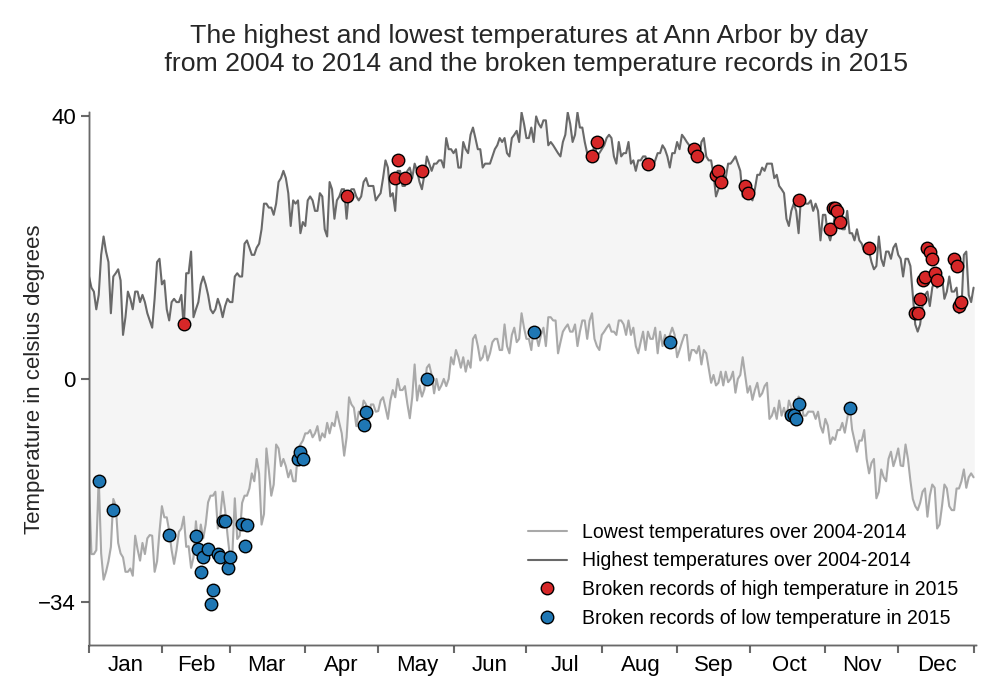

In [85]:
#---------------------------------------------------#
#---------------- Initial Settings ----------------#
#---------------------------------------------------#

# Create figure
plt.figure(figsize = (10, 7))

# Style settings
plt.style.use('seaborn-ticks')
plt.rcParams.update({
    'font.size': 16,
    'font.weight': 'normal',
    'axes.linewidth': 1,
    'xtick.color': 'black',
    'ytick.color': 'black'
})

#---------------------------------------------------#
#------------------ Plot Charts ------------------#
#---------------------------------------------------#

# Title
plt.title('The highest and lowest temperatures at Ann Arbor by day \n from 2004 to 2014 and the broken temperature records in 2015', pad = 30)

# Record low temperatures from 2004 to 2014
plt.plot(
    df_all_years['T_min'], 
    color = mcolors.CSS4_COLORS['darkgray'], 
    label = 'Lowest temperatures over 2004-2014'
)

# Record high temperatures from 2004 to 2014
plt.plot(
    df_all_years['T_max'],
    color = mcolors.CSS4_COLORS['dimgray'],
    label = 'Highest temperatures over 2004-2014'
)

# Shaded area between T_min and T_max curves
plt.fill_between(
    df_all_years.index, 
    df_all_years['T_min'].to_numpy(), 
    df_all_years['T_max'].to_numpy(), 
    color = mcolors.CSS4_COLORS['whitesmoke']
)

# Broken records of high temperature over 2015
plt.plot(
    df_2015_records_high.index, 
    df_2015_records_high,
    color = mcolors.TABLEAU_COLORS['tab:red'],
    linestyle = '',
    marker = 'o',
    markersize = 9,
    markeredgewidth = 1,
    markeredgecolor = mcolors.CSS4_COLORS['black'],
    label = 'Broken records of high temperature in 2015'
)

# Broken records of low temperature over 2015
plt.plot(
    df_2015_records_low.index,
    df_2015_records_low,
    color = mcolors.TABLEAU_COLORS['tab:blue'],
    linestyle = '',
    marker = 'o',
    markersize = 9,
    markeredgewidth = 1,
    markeredgecolor = mcolors.CSS4_COLORS['black'],
    label = 'Broken records of low temperature in 2015'
)

# Legend
plt.legend(
    frameon = False,
    loc = 'lower right',
    labelcolor = 'black',
    fontsize = 14
)

#---------------------------------------------------#
#----------------- Formatting Axes -----------------#
#---------------------------------------------------#

# Axes
ax1 = plt.gca() # Current Axes
ax2 = ax1.twiny() # y-twin

#---------- Spines ------------#

for pos in ['right', 'top']: 
    ax1.spines[pos].set_visible(False)
    ax2.spines[pos].set_visible(False)
    
for pos in ['left', 'bottom']: 
    ax2.spines[pos].set_linewidth(1)
    ax2.spines[pos].set_color(mcolors.CSS4_COLORS['dimgray'])
    
#---------- Xticks ------------#

# Range of months from 01-01-1900 to 01-01-1901
months_range = pd.date_range(start='1-01-2015', end='1-01-2016', freq='SM')

# Setting ax1 which contains only small vertical lines #

ax1.set_xlim(pd.to_datetime(['01-01-2015']), pd.to_datetime(['01-01-2016'])) # Setting limits
ax1.set_xticks(months_range[1::2].append(pd.to_datetime(['01-01-2015'])), labels = ['']*13) # Adding ticks
ax1.tick_params(width = 1.5, color = mcolors.CSS4_COLORS['dimgray'])

# Setting ax2 which contains the months names #

ax2.set_xlim(ax1.get_xlim()) # Setting x limit
ax2.xaxis.tick_bottom() # Put ax2 at the bottom
ax2.tick_params(length = 0, pad = 7) # Remove the vertical lines

# Range of months for ax2
months_ax2 = months_range[::2]
months_ax2.values[1] = np.datetime64('2015-02-14')
months_ax2.values[[0, 4, 6, 7, 9, 11]] += pd.Timedelta(days=1)

# Add ticks
ax2.set_xticks(
    months_range[::2],
    labels = months_range[::2].month_name().str.slice(stop = 3)
)

#---------- Yticks ------------#

ax2.set_ylim(-df_all_years['T_max'].max(), df_all_years['T_max'].max())
ax2.set_yticks([int(df_2015['T_min'].min()), 0, int(df_all_years['T_max'].max())])
ax1.set_ylabel('Temperature in celsius degrees', labelpad = -5)

plt.tight_layout()
plt.savefig('highest_lowest_temperatures.png')
plt.show()